## Mapping and plotting tools

GeoPandas provides a high-level interface to the matplotlib library for making maps. Mapping shapes is as easy as using the plot() method on a GeoSeries or GeoDataFrame.


In [1]:
import geopandas 
import geodatasets

c:\Users\Hasem\miniconda3\envs\geogee\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


In [2]:
chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))

groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))

Extracting 'chicago_commpop/chicago_commpop.geojson' from 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip' to 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\chicago_commpop.zip.unzip'
Extracting 'grocery/chicago_sup.shp' from 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.dbf' from 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.shx' from 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip.unzip'
Extracting 'grocery/chicago_sup.prj' from 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\grocery.zip' to 'C:\Users\Hasem\AppData\Local\geodatasets\geodatasets\Cache\gr

In [14]:
chicago.head(5)

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


<Axes: >

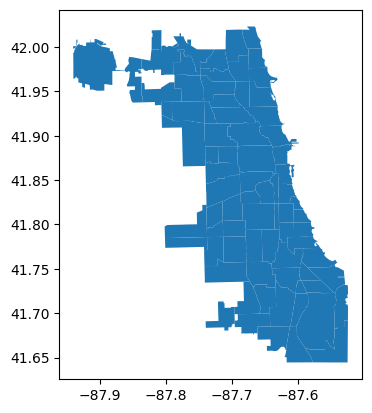

In [4]:
chicago.plot()

<Axes: >

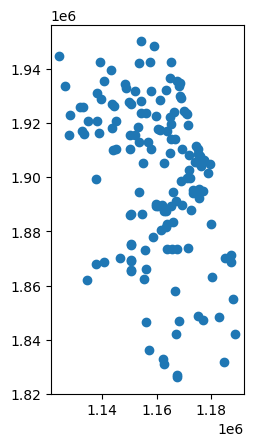

In [5]:
groceries.plot()

### Choropleth maps

GeoPandas makes it easy to create Choropleth maps (maps where the color of each shape is based on the value of an associated variable). Simply use the plot command with the column argument set to the column whose values you want used to assign colors.


In [6]:
chicago.columns

Index(['community', 'NID', 'POP2010', 'POP2000', 'POPCH', 'POPPERCH',
       'popplus', 'popneg', 'geometry'],
      dtype='object')

<Axes: >

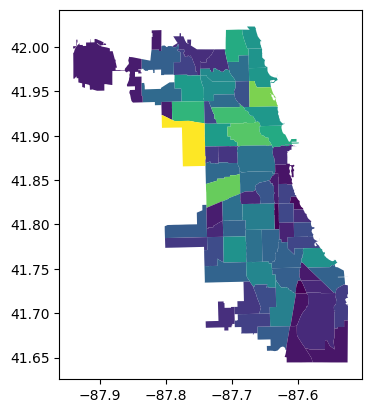

In [7]:
chicago.plot(column='POP2000')

<Axes: >

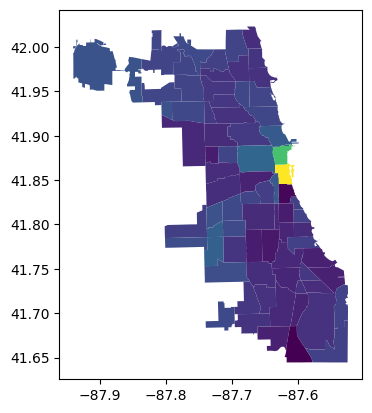

In [13]:
chicago.plot(column='POPPERCH')

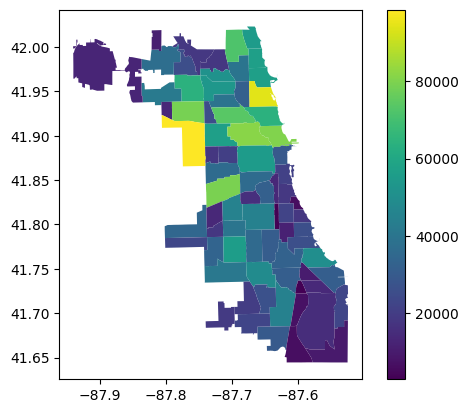

In [15]:
# Creating a legend
chicago.plot(column='POP2010', legend=True);

<Axes: >

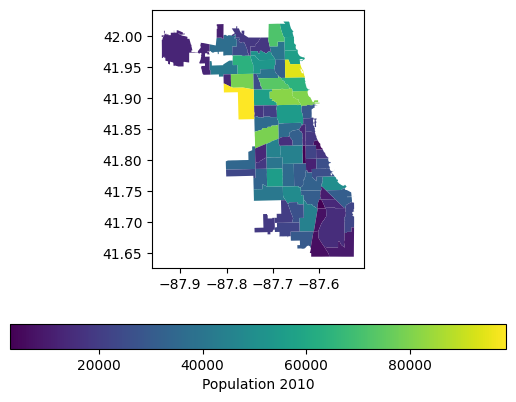

In [17]:
# The following example plots the color bar below the map and adds its label using legend_kwds: 
chicago.plot(
    column='POP2010',
    legend=True,
    legend_kwds={'label': "Population 2010", 'orientation': "horizontal"}
)

### Choosing colors

You can also modify the colors used by plot() with the cmap option. For a full list of colormaps, see Choosing Colormaps in Matplotlib.


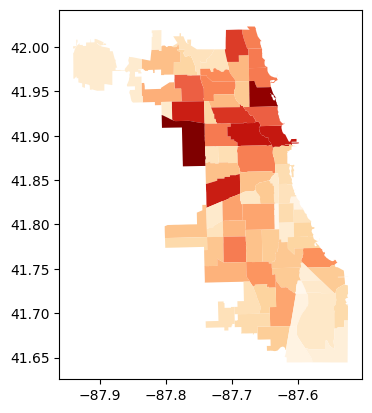

In [18]:
chicago.plot(column='POP2010', cmap='OrRd');

### Plot only the boundries


<Axes: >

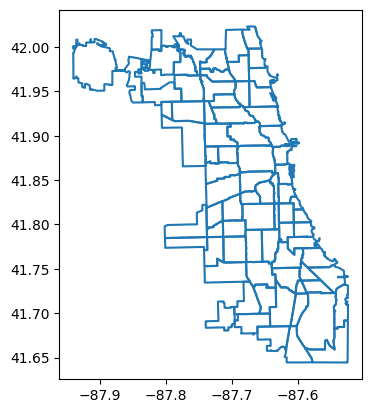

In [19]:
chicago.boundary.plot()

<Axes: >

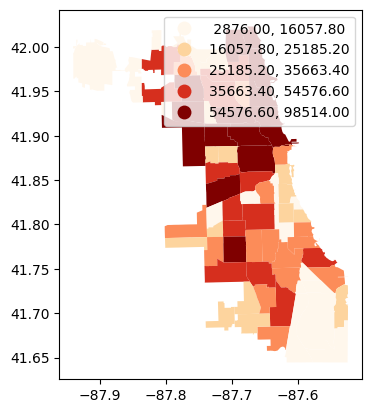

In [26]:
chicago.plot(column='POP2010', cmap='OrRd', scheme='quantiles', legend=True)

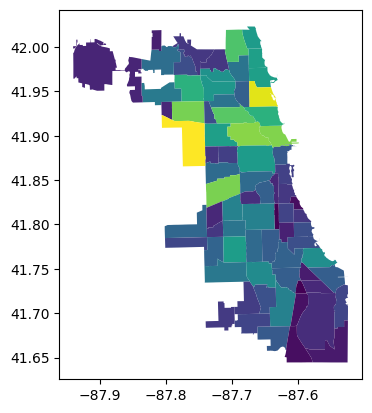

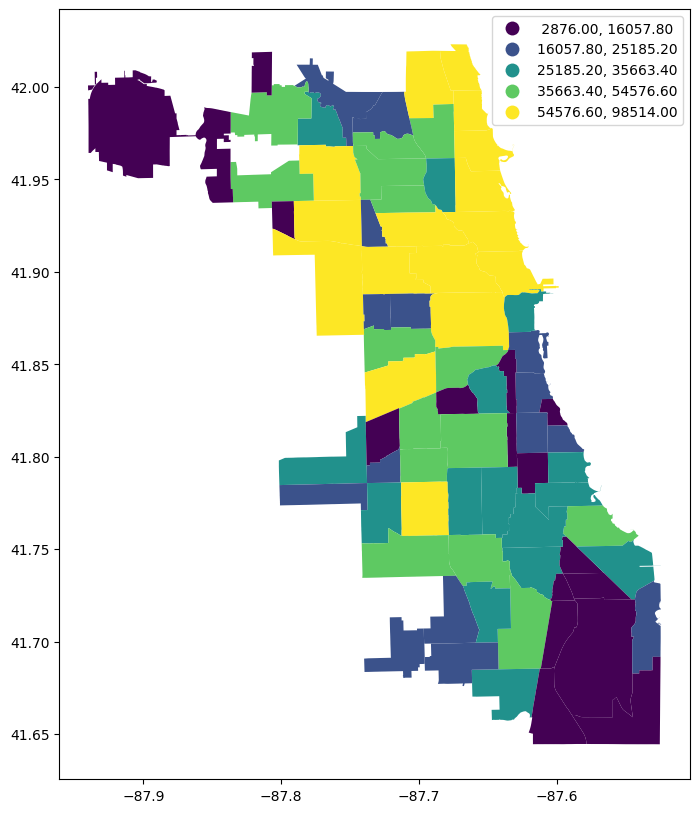

In [27]:
chicago.plot(column='POP2010', missing_kwds={'color': 'lightgrey'});

chicago.plot(
    column="POP2010",
    legend=True,
    scheme="quantiles",
    figsize=(15, 10),
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
);

### Maps with layers

There are two strategies for making a map with multiple layers – one more succinct, and one that is a little more flexible.

Before combining maps, however, remember to always ensure they share a common CRS (so they will align).


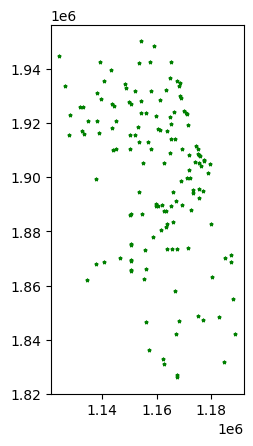

In [28]:
groceries.plot(marker='*', color='green', markersize=5);


groceries = groceries.to_crs(chicago.crs)

#### method 1


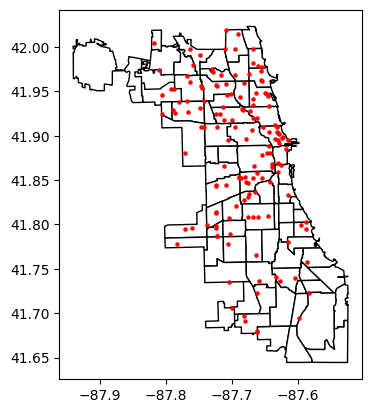

In [29]:
base = chicago.plot(color='white', edgecolor='black')

groceries.plot(ax=base, marker='o', color='red', markersize=5);

#### method 2


In [31]:
import matplotlib.pyplot as plt

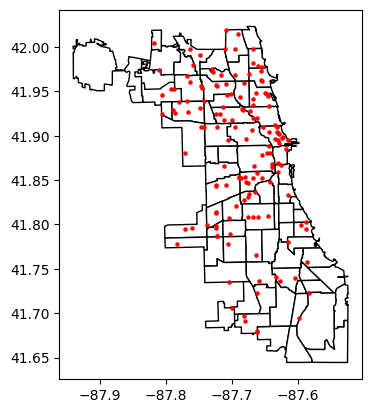

In [32]:
fig, ax = plt.subplots()

chicago.plot(ax=ax, color='white', edgecolor='black')


groceries.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();


### Control the order of multiple layers in a plot

When plotting multiple layers, use zorder to take control of the order of layers being plotted. The lower the zorder is, the lower the layer is on the map and vice versa.

Without specified zorder, cities (Points) gets plotted below world (Polygons), following the default order based on geometry types.


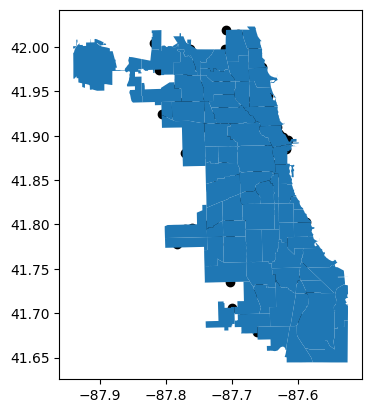

In [33]:
# 2 layers 
ax = groceries.plot(color='k')

chicago.plot(ax=ax);

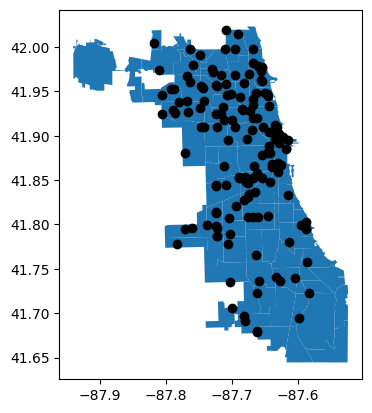

In [34]:
# 2 layers 
ax = groceries.plot(color='k', zorder=2)

chicago.plot(ax=ax, zorder=1);

<Axes: ylabel='Frequency'>

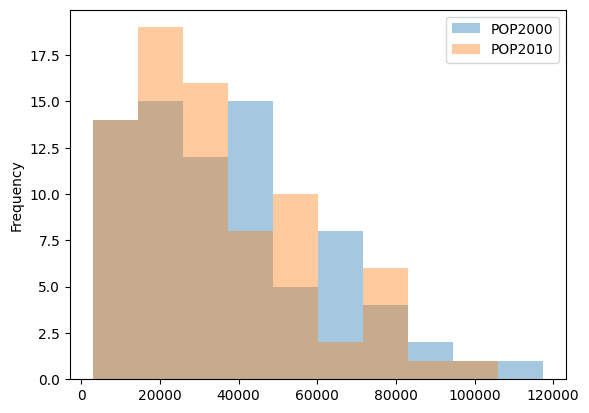

In [40]:
chicago[["POP2000", 'POP2010']].plot.hist(alpha=0.4)